In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
%matplotlib inline
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy
import sys
from matplotlib.pyplot import cm
from matplotlib.pyplot import figure
from pylab import rcParams


In [2]:
# acesso ao arquivo por leitura
arquivo_municipíos = open('municipios.csv', 'r', encoding="utf8")
lista_municipios = arquivo_municipíos.readlines()
arquivo_municipíos.close()

# pular a linha inicial com as colunas que seriam da tabela

lista_municipios = [item.strip() for item in lista_municipios[1:]]

# filtro de municipios de SP e organizacao de informacoes em lista de dicionarios

local_municipios = []
for item in lista_municipios:
    municipio = item.split(',')
    if int(municipio[5]) == 35:
        dicionario_municipio = {
            'codigo': municipio[0],
            'nome': municipio[1],
            'latitude': municipio[2],
            'longitude': municipio[3],
            'capital': municipio[4],
            'uf': municipio[5]
        }
        local_municipios.append(dicionario_municipio)

In [3]:
# acesso aos dados iniciais na planilha de Municipios

arquivo_populacao = r'POP2020_20201030.xls'
df_populacao = pd.read_excel(arquivo_populacao, sheet_name='Municípios', usecols=[0, 1, 2, 3, 4], skiprows=1)

# filtro inicial para municipios de SP

df_populacao = df_populacao[['UF', 'COD. UF', 'COD. MUNIC', 'NOME DO MUNICÍPIO', 'POPULAÇÃO ESTIMADA']]
df_sao_paulo = df_populacao.loc[df_populacao['UF'] == 'SP']

# conversao de tipos de dados para poder trabalhar (string -> int)
df_sao_paulo['POPULAÇÃO ESTIMADA'] = df_sao_paulo['POPULAÇÃO ESTIMADA'].astype(int)
df_sao_paulo['COD. MUNIC'] = df_sao_paulo['COD. MUNIC'].astype(int)



C:\Users\mrpad\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\mrpad\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [4]:
# configuracao de dados em lista de dicionarios
corte_população=350000
sao_paulo_maiores = df_sao_paulo.loc[df_sao_paulo['POPULAÇÃO ESTIMADA'] >= corte_população]

sao_paulo_maiores = sao_paulo_maiores.to_dict('records')

In [5]:
# PROCESSAMENTO

# comparacao dos dados filtrados para combinar a posicao com populacao
lista_final = []
for populacao in sao_paulo_maiores:
    for coordenadas in local_municipios:
        if coordenadas['nome'] == populacao['NOME DO MUNICÍPIO']:
            infos_municipio = {
                'nome': coordenadas['nome'],
                'latitude': float(coordenadas['latitude']),
                'longitude': float(coordenadas['longitude']),
                'habitantes': populacao['POPULAÇÃO ESTIMADA']
            }
            lista_final.append(infos_municipio)

In [6]:
# criacao da saida pronta dos dados para analise grafica em suas respectivas listas
lista_posicoes = []
for item in lista_final:
    lat_long = [item['latitude'], item['longitude']]
    lista_posicoes.append(lat_long)

In [7]:
lista_nomes = []
for item in lista_final:
    lista_nomes.append(item['nome'])
# lista_posicoes = [[1, 2], [1, 3], [2, 3], ...]
# Array = ["são Paulo", "Campinas", ...	# lista_nomes = ["São Paulo", "Campinas", ...]

In [8]:
len(lista_nomes)

21

In [9]:
rcParams['figure.figsize'] = 14, 5
hierarchy.set_link_color_palette(['r', 'g', 'm', 'y'])
#Setando parametros de tamanho de figura e cores

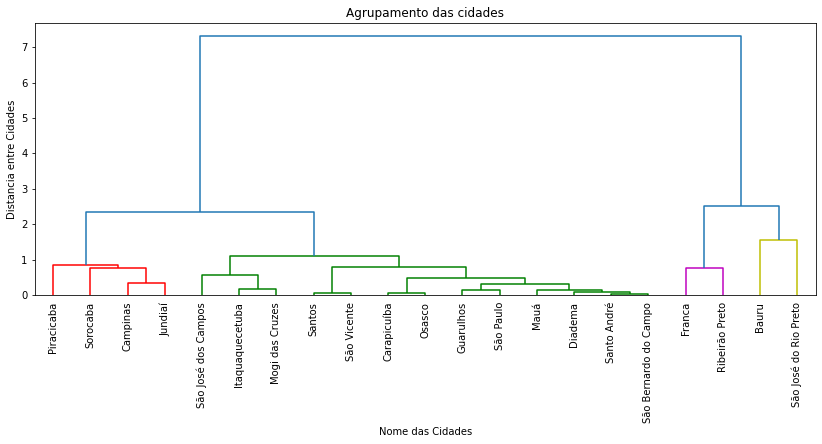

In [10]:
#criando os agrupamentos usando a função linkage
#usa distancia euclidiana e método Ward variance minimization algorithm
dados=sch.linkage(lista_posicoes, method = 'ward', metric='euclidean')
# gera o dendograma como imagem
grafico=sch.dendrogram(dados,
                       labels=lista_nomes,
                       distance_sort='true',
                       #,leaf_font_size=14
                       leaf_rotation=90,
                       color_threshold=1.8
                      )#ordenada do menor para maior

#parametros para plotar o gráfico e salvar como arquivo
plt.title('Agrupamento das cidades')
plt.xlabel('Nome das Cidades')
plt.ylabel('Distancia entre Cidades')
plt.savefig('dendrograma.jpg', bbox_inches='tight', dpi=500)
plt.show()